<a href="https://colab.research.google.com/github/Gnaneswar-Arnepalli/Parkinson-disease-detection/blob/main/parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [ ]:
import pandas as pd

df = pd.read_csv('/content/parkinson_data.csv')

print(df.head())  # Display first few rows to verify


   age  eye_blinking  handshaking  MDVP:Fo(Hz)  result
0   52             1            1         92.5       1
1   47             0            1         88.3       1
2   55             1            0         95.7       1
3   36             0            0        153.2       0
4   43             1            1        102.1       0


In [ ]:
df.head()


,age,eye_blinking,handshaking,MDVP:Fo(Hz),result
0,52,1,1,92.5,1
1,47,0,1,88.3,1
2,55,1,0,95.7,1
3,36,0,0,153.2,0
4,43,1,1,102.1,0


In [ ]:
df.tail()

,age,eye_blinking,handshaking,MDVP:Fo(Hz),result
43,42,0,0,79.6,0
44,58,1,1,96.7,1
45,35,1,0,100.0,0
46,48,0,1,90.4,1
47,54,1,0,115.9,0


In [ ]:

print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 5
Number of Instances In Dataset :  48


In [ ]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 5
Number of Instances In Dataset :  48


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           48 non-null     int64  
 1   eye_blinking  48 non-null     int64  
 2   handshaking   48 non-null     int64  
 3   MDVP:Fo(Hz)   48 non-null     float64
 4   result        48 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 2.0 KB


In [ ]:

df.describe()

,age,eye_blinking,handshaking,MDVP:Fo(Hz),result
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,45.812500,0.562500,0.520833,101.279167,0.520833
std,8.569258,0.501328,0.504852,19.526752,0.504852
min,31.000000,0.000000,0.000000,76.800000,0.000000
25%,38.750000,0.000000,0.000000,90.275000,0.000000
50%,46.500000,1.000000,1.000000,97.000000,1.000000
75%,53.250000,1.000000,1.000000,102.500000,1.000000
max,59.000000,1.000000,1.000000,167.300000,1.000000


In [ ]:
df['result'] = df['result'].astype('uint8')

In [ ]:
df['result'] = df['result'].astype('uint8')

In [ ]:
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [ ]:
df.isna().sum()

,0
age,0
eye_blinking,0
handshaking,0
MDVP:Fo(Hz),0
result,0


<Axes: xlabel='result', ylabel='count'>

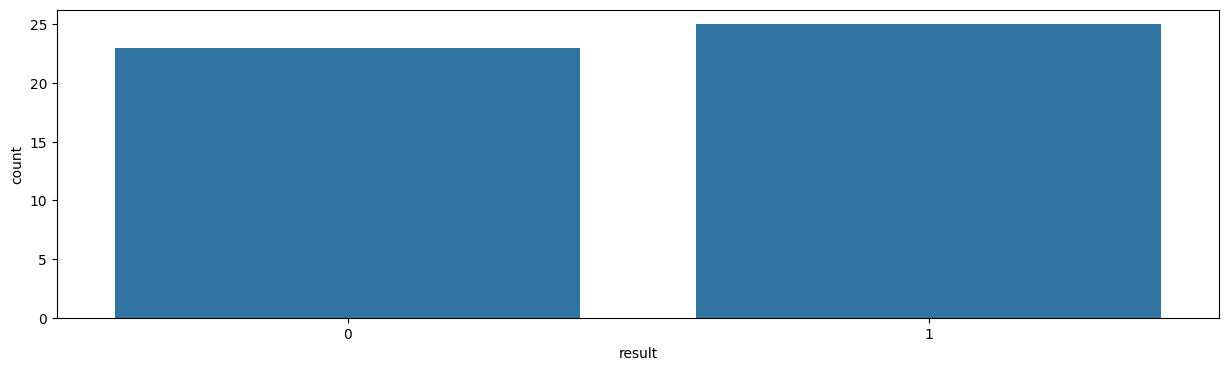

In [ ]:
sns.countplot(x='result',data=df)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
X = df.drop('result', axis=1)
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Before SMOTE:", y_train.value_counts())
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE:", pd.Series(y_train_res).value_counts())

Before SMOTE: result
0    19
1    19
Name: count, dtype: int64
After SMOTE: result
0    19
1    19
Name: count, dtype: int64


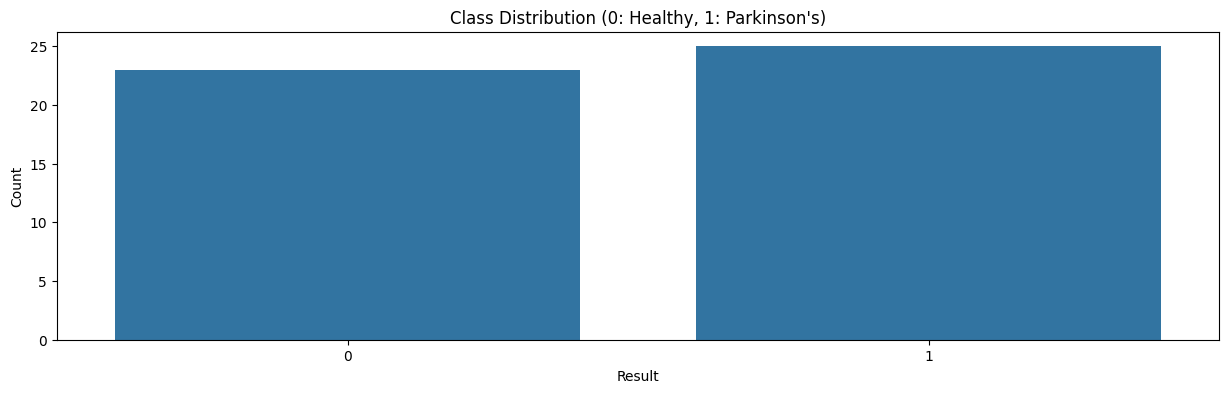

In [ ]:
sns.countplot(x='result', data=df)
plt.title("Class Distribution (0: Healthy, 1: Parkinson's)")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()

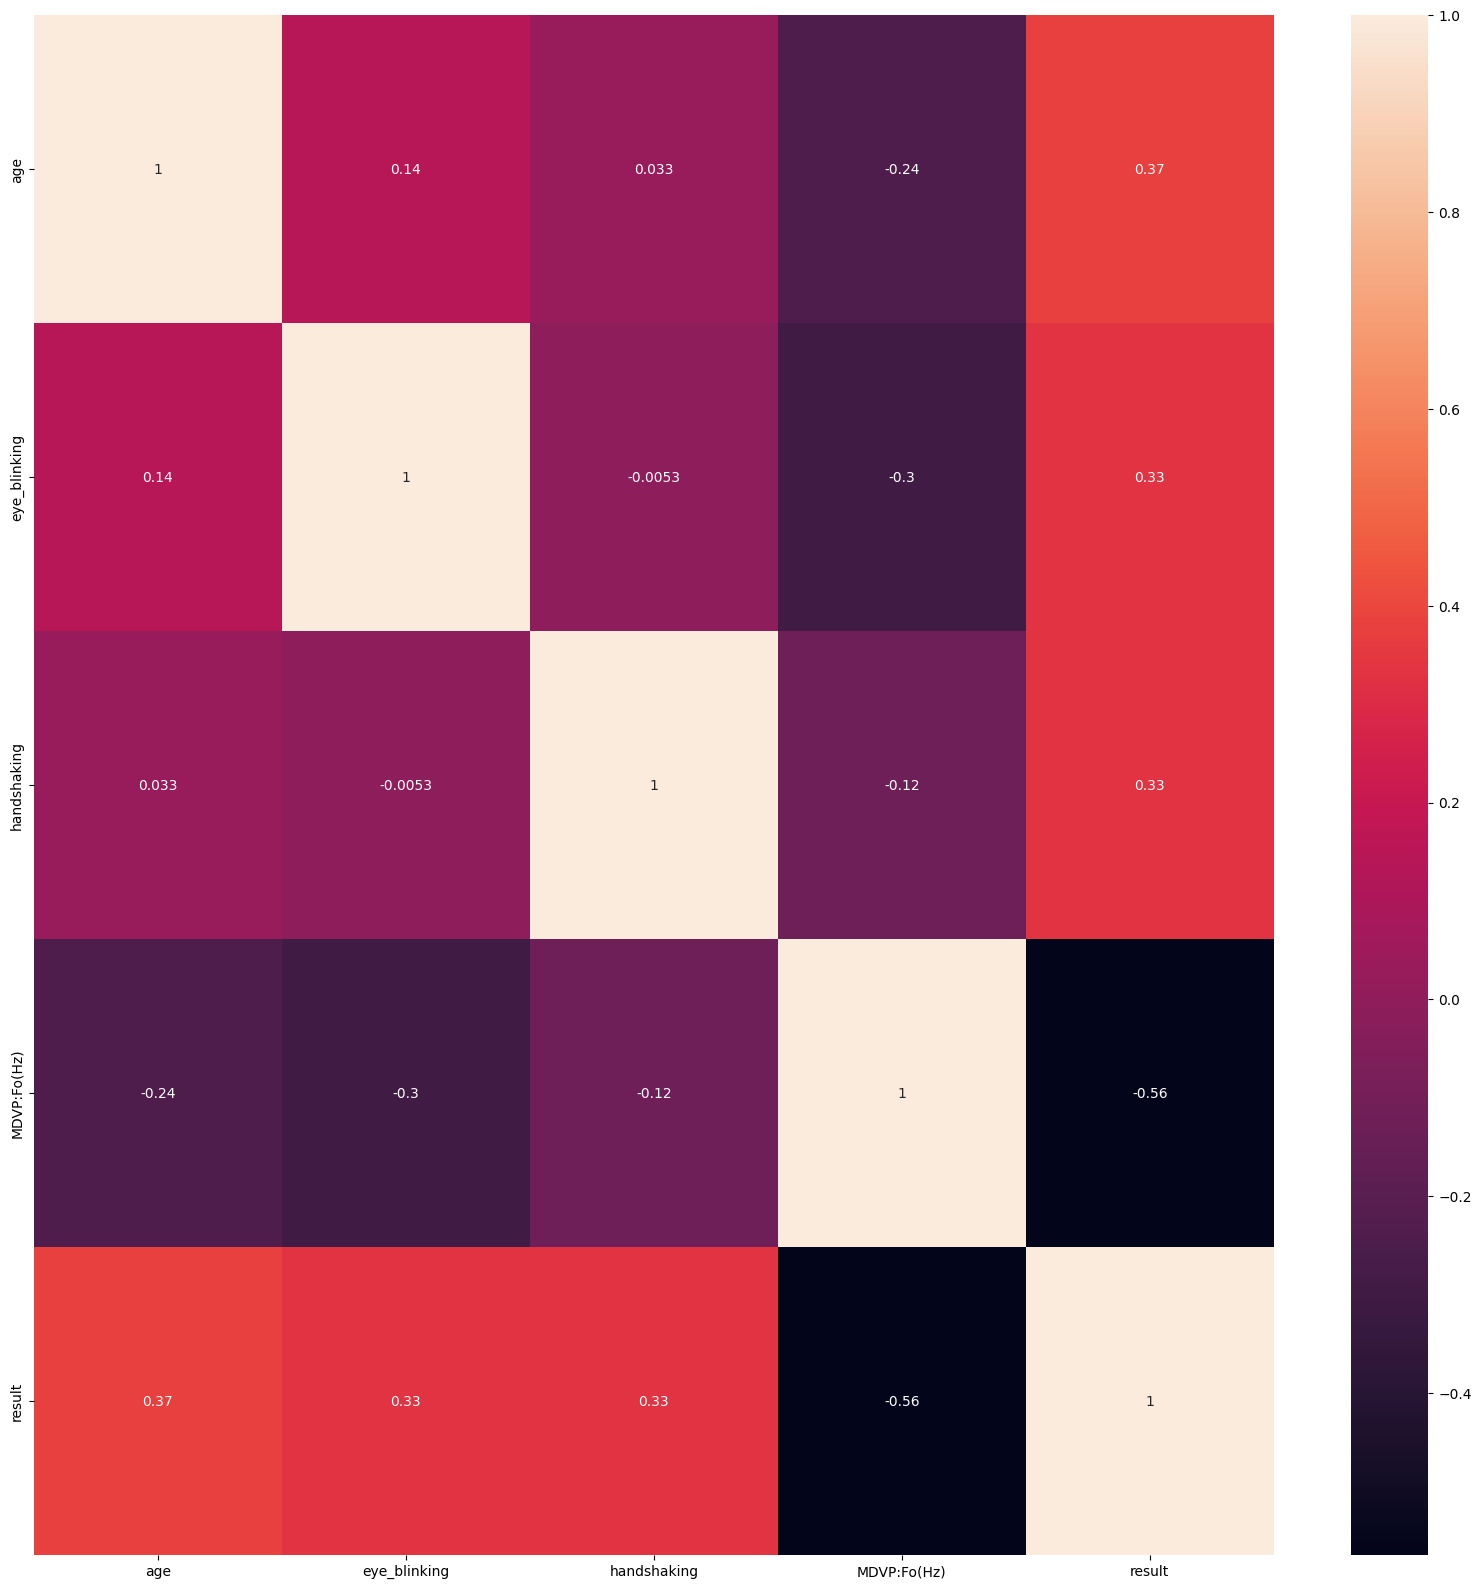

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), annot=True, ax=ax)
plt.show()


In [ ]:
# Drop low-correlation features (e.g., age)
X = df.drop(['result', 'age'], axis=1)

In [ ]:
# Create a combined symptom score
df['symptom_score'] = df['eye_blinking'] + df['handshaking']

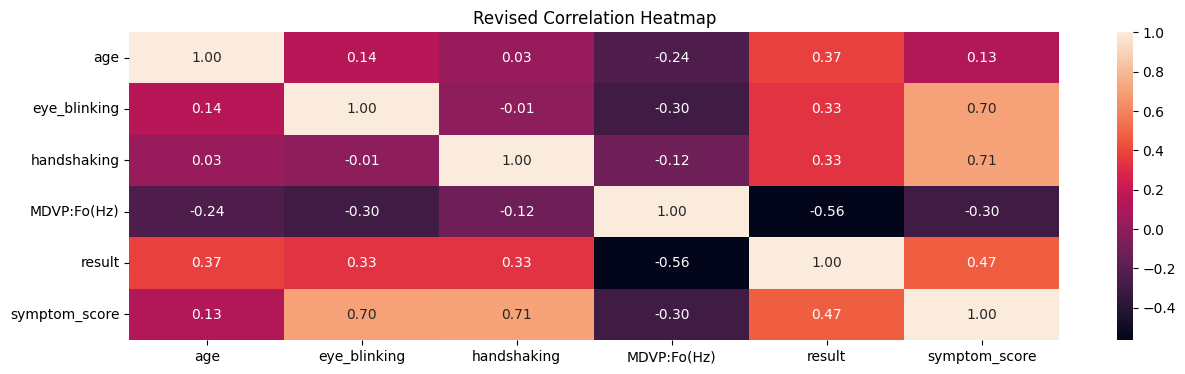

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Revised Correlation Heatmap")
plt.show()

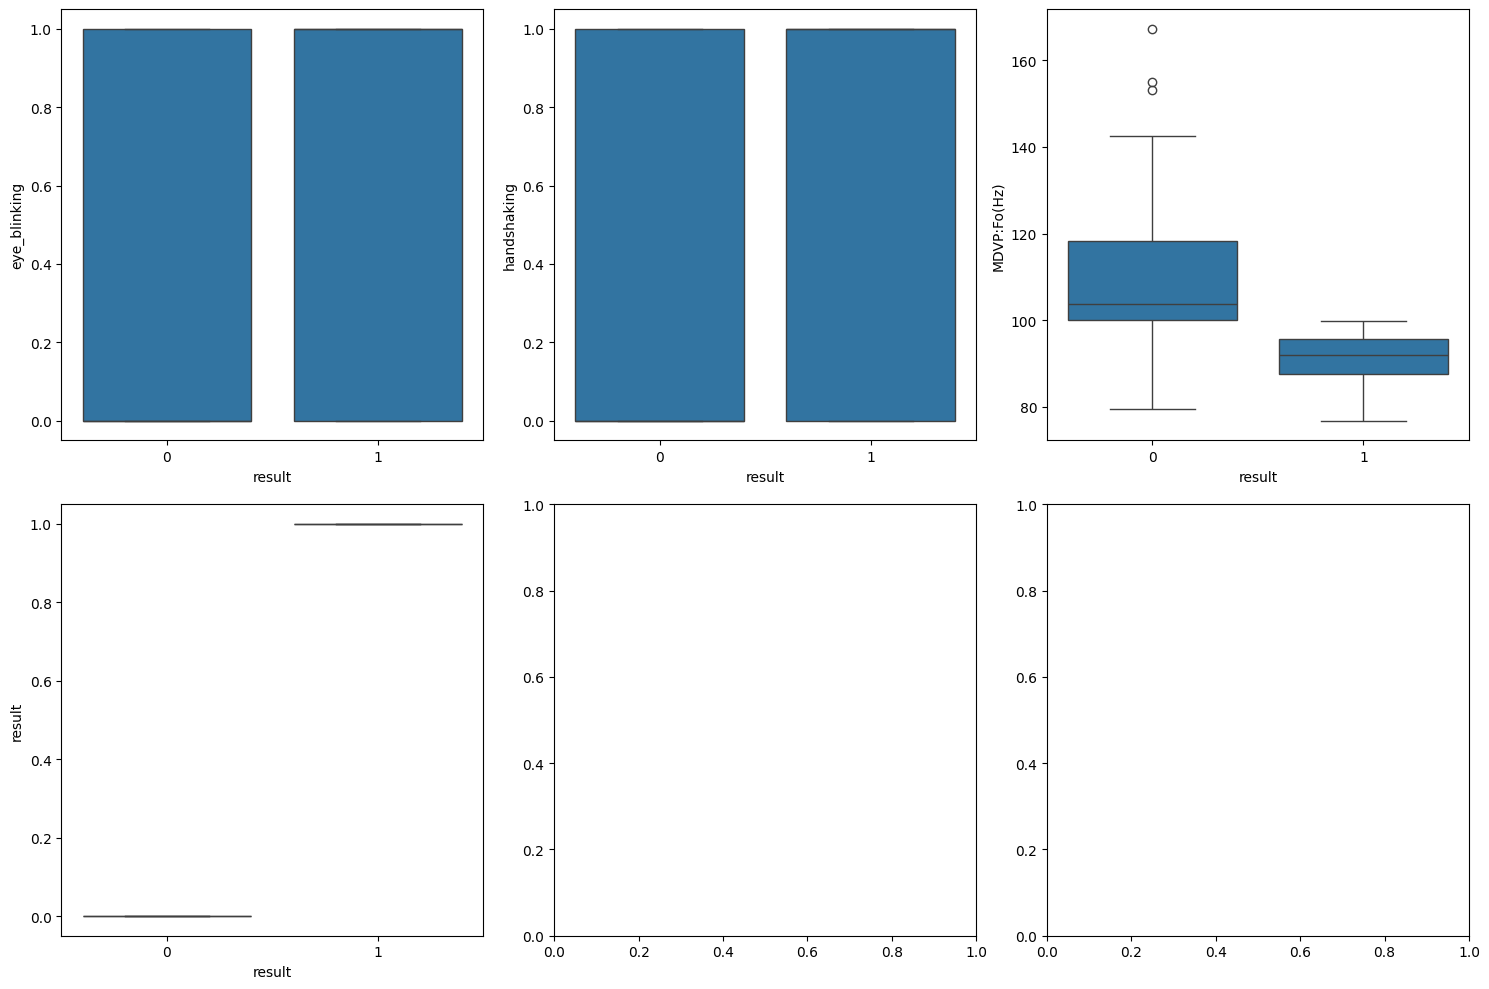

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i in range(1, len(df.columns)-1):  # Assuming 1 to 4
    sns.boxplot(x='result', y=df.iloc[:, i], data=df, ax=axes[i-1])

plt.tight_layout()
plt.show()


In [ ]:
# Combine symptoms into a single score
df['symptom_score'] = df['eye_blinking'] + df['handshaking']

In [ ]:
# Cap MDVP values
df['MDVP:Fo(Hz)'] = df['MDVP:Fo(Hz)'].clip(upper=200)

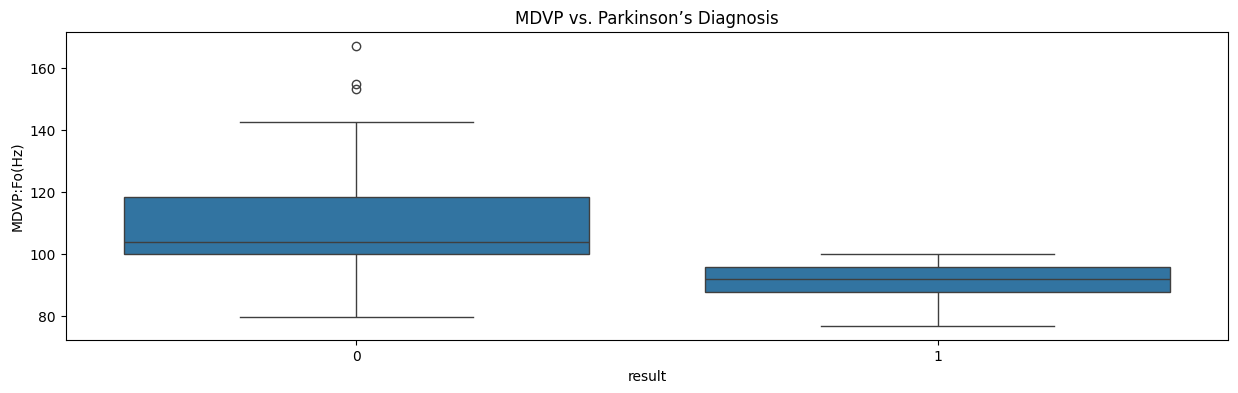

In [ ]:
sns.boxplot(x='result', y='MDVP:Fo(Hz)', data=df)
plt.title("MDVP vs. Parkinson’s Diagnosis")
plt.show()

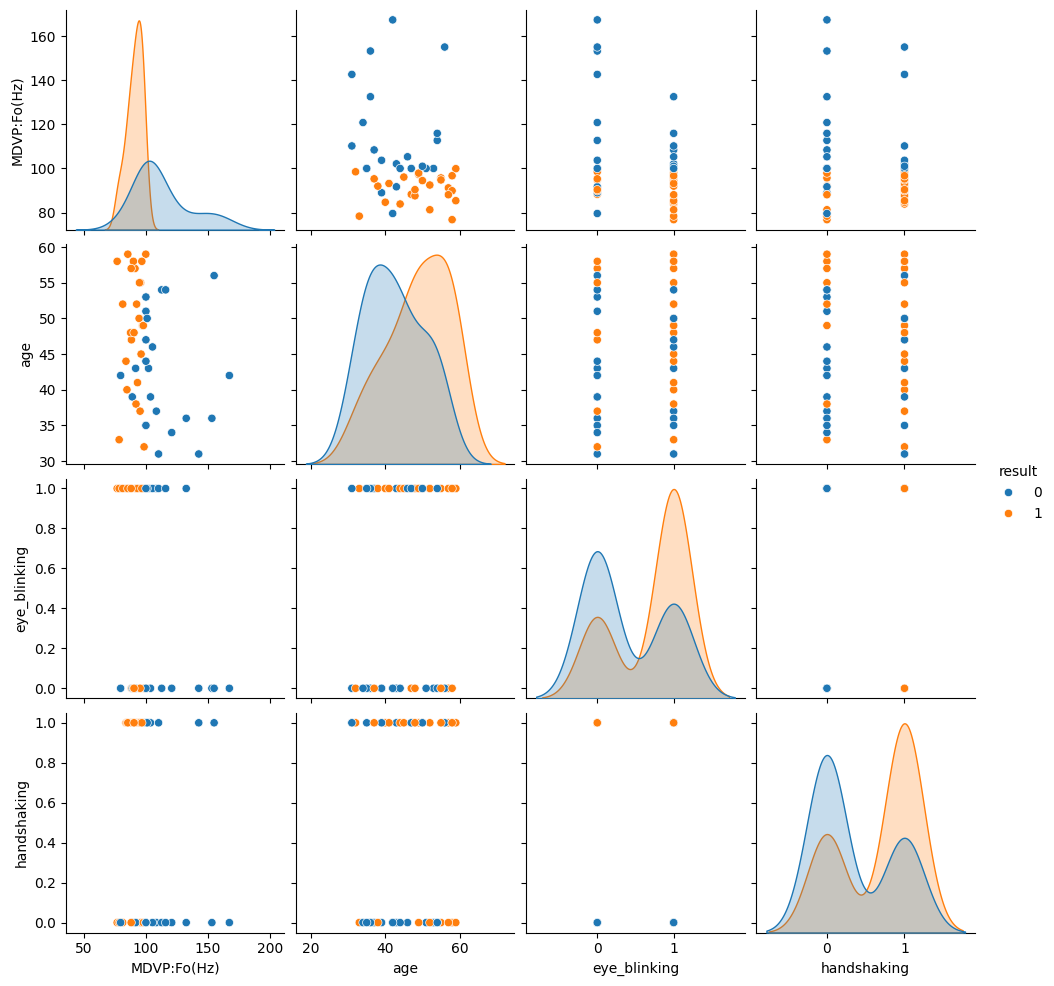

In [ ]:

plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'result', vars = ['MDVP:Fo(Hz)','age','eye_blinking','handshaking', ] )
plt.show()

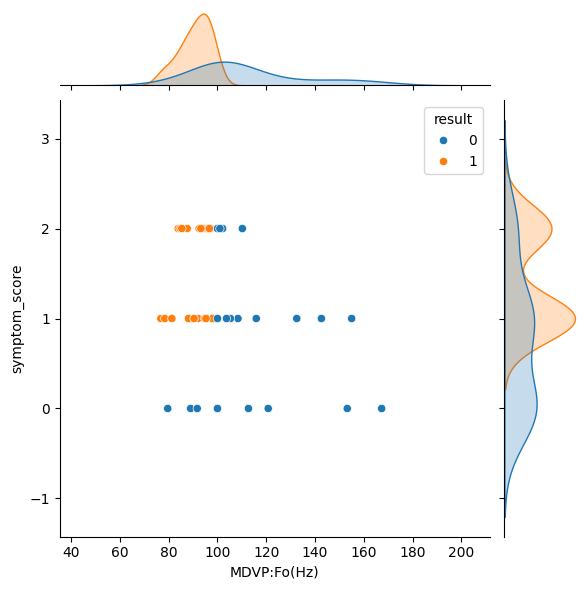

In [ ]:
sns.jointplot(x='MDVP:Fo(Hz)', y='symptom_score', hue='result', data=df)

In [ ]:
# Combine symptoms
df['symptom_score'] = df['eye_blinking'] + df['handshaking']

In [ ]:
X = df.drop(['result', 'age'], axis=1)  # Remove 'age' if no impact

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)

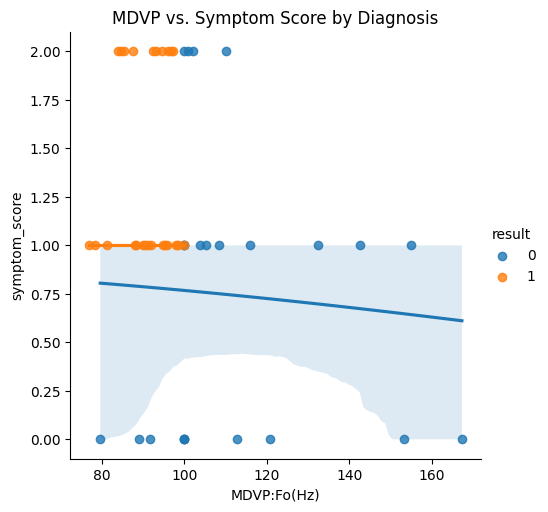

In [ ]:
sns.lmplot(x='MDVP:Fo(Hz)', y='symptom_score', hue='result', data=df, logistic=True)
plt.title("MDVP vs. Symptom Score by Diagnosis")
plt.show()

In [ ]:
df['result'].value_counts()

,count
result,
1,25
0,23


In [ ]:
X = df.drop(['result'], axis=1)
y = df['result']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (48, 5)
Target (y) Shape Before Balancing : (48,)


In [ ]:
sm = SMOTE(random_state=300)

In [ ]:
# Encode categorical data in X
X = X.apply(lambda col: col.map({'yes': 1, 'no': 0}) if col.dtype == 'object' else col)

# Encode categorical target variable (y)
if y.dtype == 'object':
    y = y.map({'yes': 1, 'no': 0})


In [ ]:

X, y = sm.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Split FIRST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Check original imbalance
print("Before SMOTE:", y_train.value_counts())

# 3. Balance ONLY the training set
sm = SMOTE(random_state=300)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 4. Verify corrected shapes
print("After SMOTE (Training):", X_train_res.shape, y_train_res.shape)  # Should show balanced classes
print("Test set (unchanged):", X_test.shape, y_test.shape)  # Should remain original size

Before SMOTE: result
0    21
1    19
Name: count, dtype: int64
After SMOTE (Training): (42, 5) (42,)
Test set (unchanged): (10, 5) (10,)


In [ ]:
scaler = MinMaxScaler((-1,1))

In [ ]:
X_features = scaler.fit_transform(X)
Y_labels = y

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_labels, test_size=0.20, random_state=20)


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
param_grid = {
    'max_features': ['sqrt', 'log2', None],  # Removed 'auto' and added None
    'max_depth': range(1, 10),
    'random_state': range(30, 210, 30),
    'criterion': ['gini', 'entropy']
}

from sklearn.model_selection import GridSearchCV
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
CV_dt.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['sqrt', 'log2', None],
                         'random_state': range(30, 210, 30)})

In [ ]:
# prompt: CV_dt.best_params_

CV_dt.best_params_


{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'random_state': 30}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Corrected: Use 'sqrt' or 'log2' instead of 'auto'
dt1 = DecisionTreeClassifier(random_state=120, max_features='sqrt', max_depth=6, criterion='entropy')

# Fit the model
dt1.fit(X_train, y_train)

# Make predictions
predDT = dt1.predict(X_test)

# Print classification report
print(classification_report(y_test, predDT))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.67      0.67      0.67         3

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



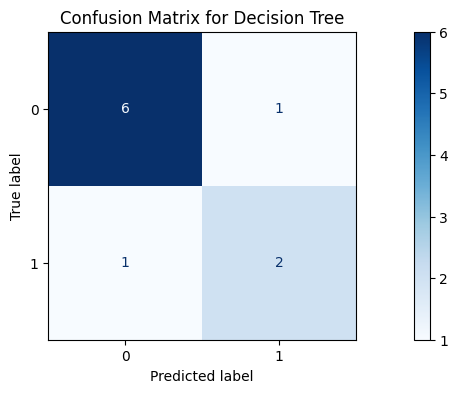

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, predDT)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Add title
plt.title('Confusion Matrix for Decision Tree')
plt.show()


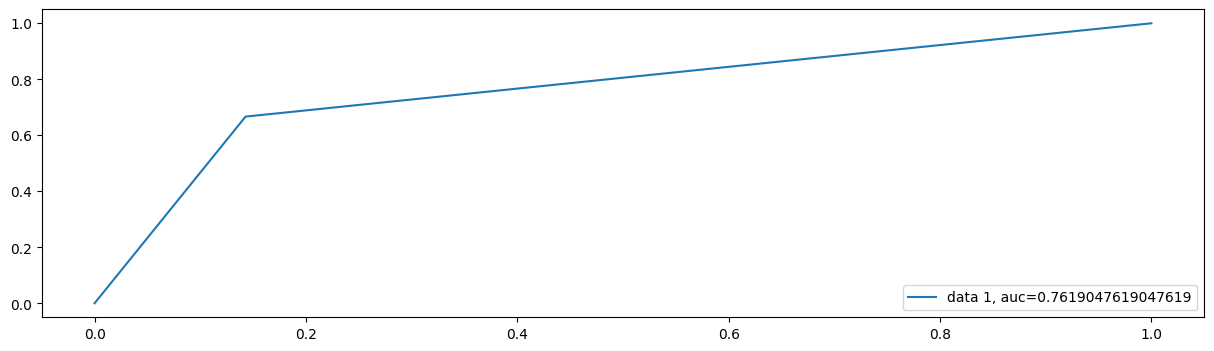

In [ ]:
y_pred_proba = dt1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
import joblib  # Import joblib

# Dumping Decision Tree Classifier
joblib.dump(dt1, 'dt_clf.pkl')


['dt_clf.pkl']

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predRF = rfc.predict(X_test)

print(classification_report(y_test, predRF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, n_iter=20, cv=3, n_jobs=-1, verbose=1, random_state=42)
CV_rfc=random_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
# Reduce complexity
rfc1 = RandomForestClassifier(
    n_estimators=50,  # Reduce from 125
    max_depth=3,      # Reduce from 7
    max_samples=0.8,  # Use subset of data per tree
    random_state=200
)
# Verify with cross-validation
cross_val_score(rfc1, X, y, cv=5, scoring='f1').mean()

np.float64(0.9555555555555555)

In [ ]:
CV_rfc.best_params_

{'random_state': 30,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini'}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Fix: Use 'sqrt' or 'log2' instead of 'auto'
rfc1 = RandomForestClassifier(
    random_state=200,
    max_features='sqrt',  # Fixed this line
    n_estimators=125,
    max_depth=7,
    criterion='entropy'
)

rfc1.fit(X_train, y_train)
predRFC = rfc1.predict(X_test)
print(classification_report(y_test, predRFC))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



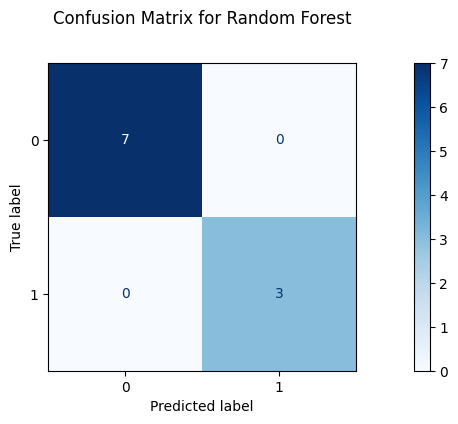

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display confusion matrix
ConfusionMatrixDisplay.from_estimator(rfc1, X_test, y_test, cmap=plt.cm.Blues)

# Add title
plt.title('Confusion Matrix for Random Forest', y=1.1)
plt.show()



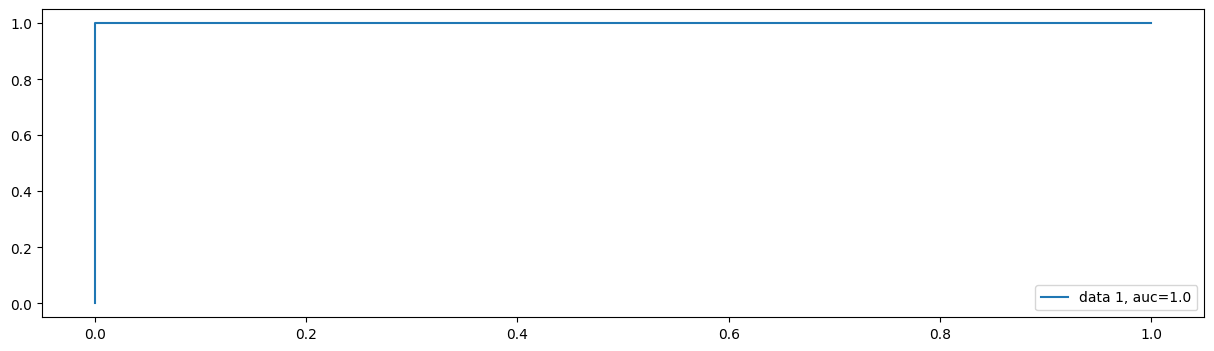

In [ ]:
y_pred_proba = rfc1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
joblib.dump(rfc1, 'rf_clf.pkl')

['rf_clf.pkl']

In [ ]:

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predlog = logmodel.predict(X_test)


In [ ]:


print(classification_report(y_test, predlog))
print("Confusion Matrix:")
confusion_matrix(y_test, predlog)

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.50      0.67      0.57         3

    accuracy                           0.70        10
   macro avg       0.67      0.69      0.67        10
weighted avg       0.73      0.70      0.71        10

Confusion Matrix:


array([[5, 2],
       [1, 2]])

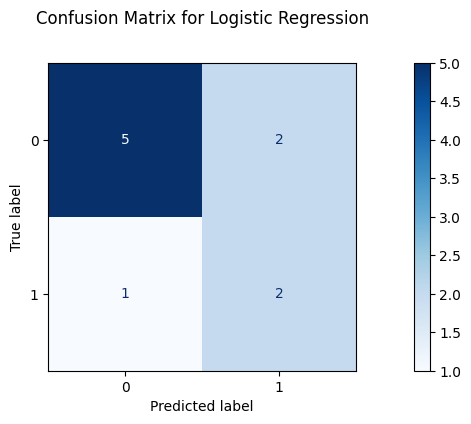

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display confusion matrix
ConfusionMatrixDisplay.from_estimator(logmodel, X_test, y_test, cmap=plt.cm.Blues)

# Add title
plt.title('Confusion Matrix for Logistic Regression', y=1.1)
plt.show()


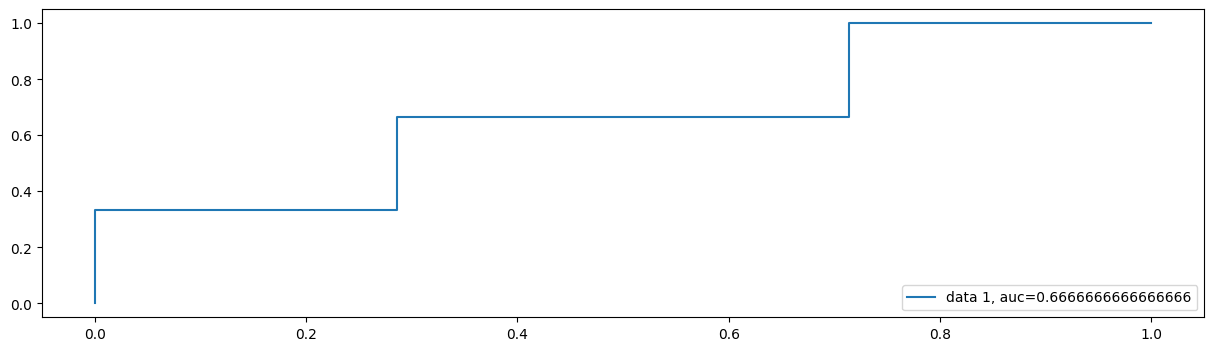

In [ ]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
joblib.dump(logmodel, 'lg_clf.pkl')

['lg_clf.pkl']

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

X_pred = clf.predict(X_train)
print("Train Set Accuracy:",metrics.accuracy_score(y_train, X_pred))

Test Set Accuracy: 0.7
Train Set Accuracy: 0.875


In [ ]:
param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose = 3)
grid_SVC.fit(X_train, y_train)

# print best parameter after tuning
print("\nBest Parameters: ", grid_SVC.best_params_)

# print how our model looks after hyper-parameter tuning
print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test)

# print classification report
print("\n", classification_report(y_test, predSVC))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.600 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.857 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.857 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

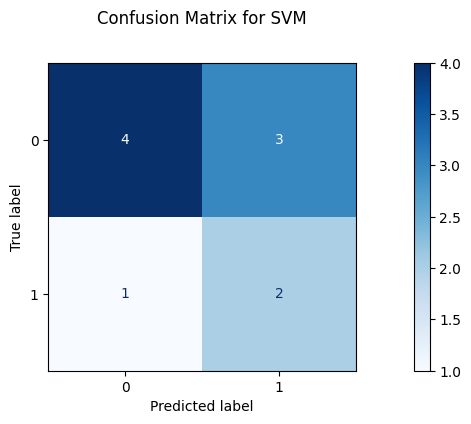

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_SVC, X_test, y_test, cmap=plt.cm.Blues)

# Add title
plt.title('Confusion Matrix for SVM', y=1.1)
plt.show()


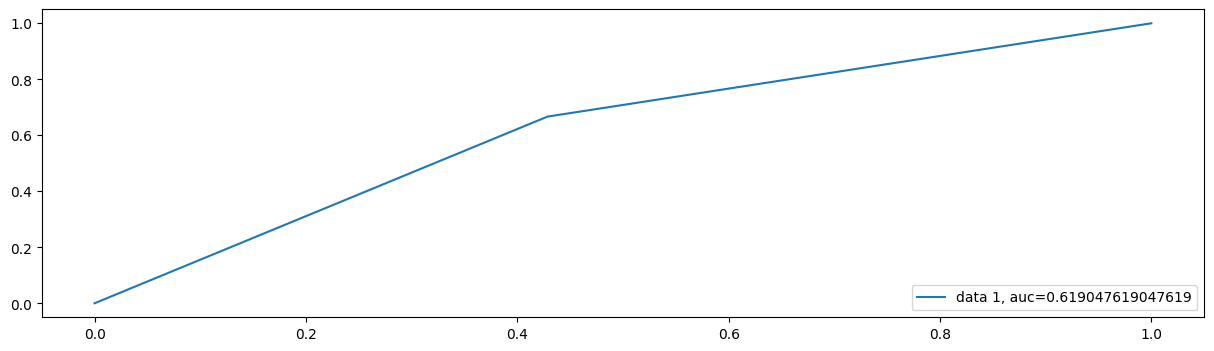

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predSVC)
auc = metrics.roc_auc_score(y_test, predSVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
joblib.dump(grid_SVC, 'svm_clf.pkl')

['svm_clf.pkl']

In [ ]:
import joblib
import sklearn
model = joblib.load("svm_clf.pkl")  # Load in your system
joblib.dump(model, "svm_clf_compatible.pkl")  # Save it again


['svm_clf_compatible.pkl']

In [ ]:

# Naive Bayes

gnb = Naive_Bayes()
gnb.fit(X_train, y_train)
predgnb = gnb.predict(X_test)

print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.67      0.67      0.67         3

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



In [ ]:

print("Confusion Matrix:")
confusion_matrix(y_test, predgnb)

Confusion Matrix:


array([[6, 1],
       [1, 2]])

In [ ]:
# scores -check how efficiently labels are predicted
accuracy_testing = accuracy_score(y_test, predgnb)
print("Accuracy % :",accuracy_testing*100)

Accuracy % : 80.0


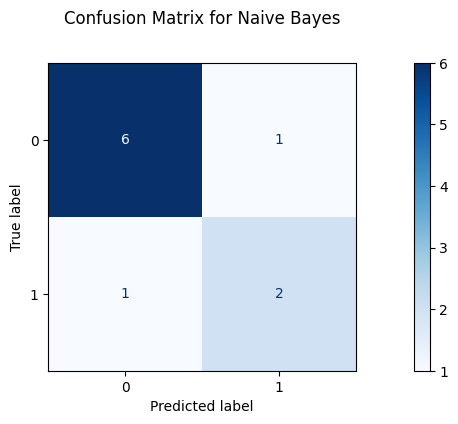

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display confusion matrix
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test, cmap=plt.cm.Blues)

# Add title
plt.title('Confusion Matrix for Naive Bayes', y=1.1)
plt.show()


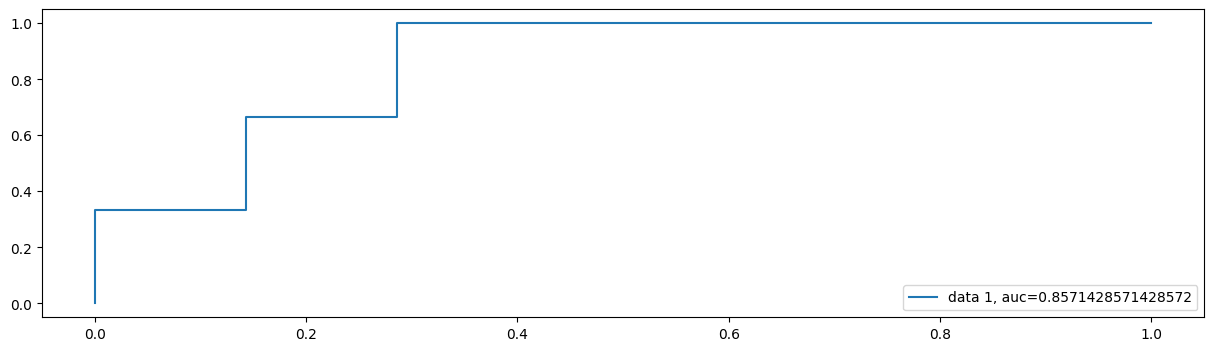

In [ ]:

y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
joblib.dump(gnb, 'nb_clf.pkl')

['nb_clf.pkl']

In [ ]:
import numpy as np

Ks = 10
mean_acc = []
ConfustionMx = [];
for n in range(2,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_test, yhat))
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.6, 0.6, 0.7, 0.6, 0.6, 0.5, 0.6, 0.5]


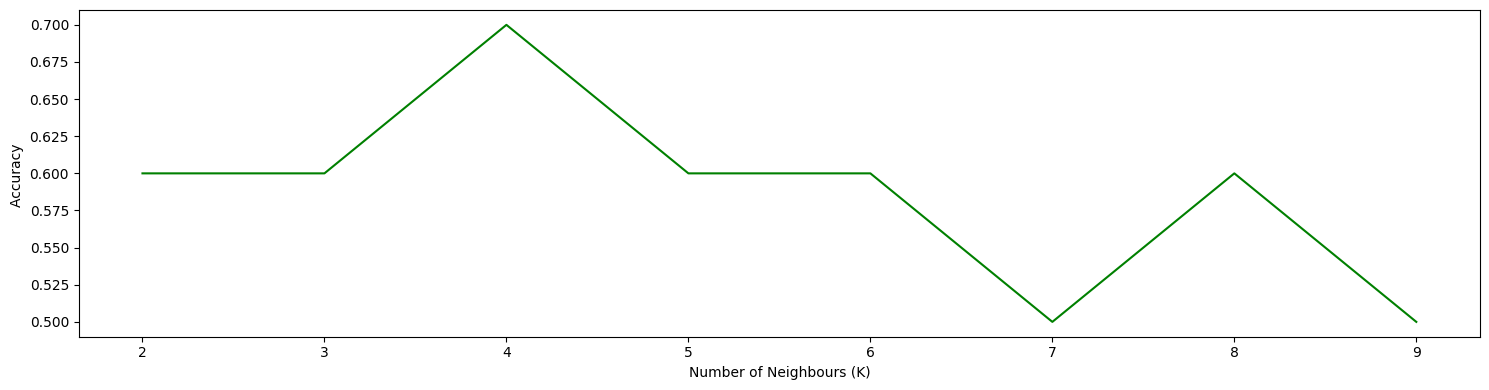

In [ ]:
plt.plot(range(2,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predKNN = knn.predict(X_test)

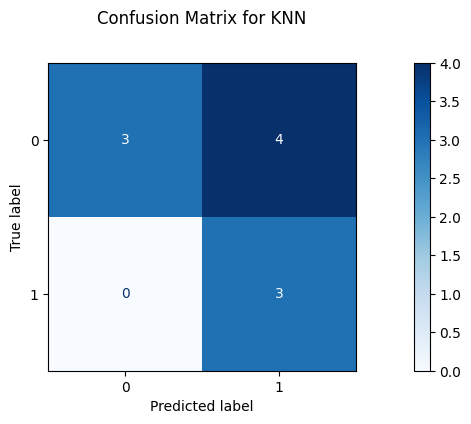

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap=plt.cm.Blues)

# Add title
plt.title('Confusion Matrix for KNN', y=1.1)
plt.show()


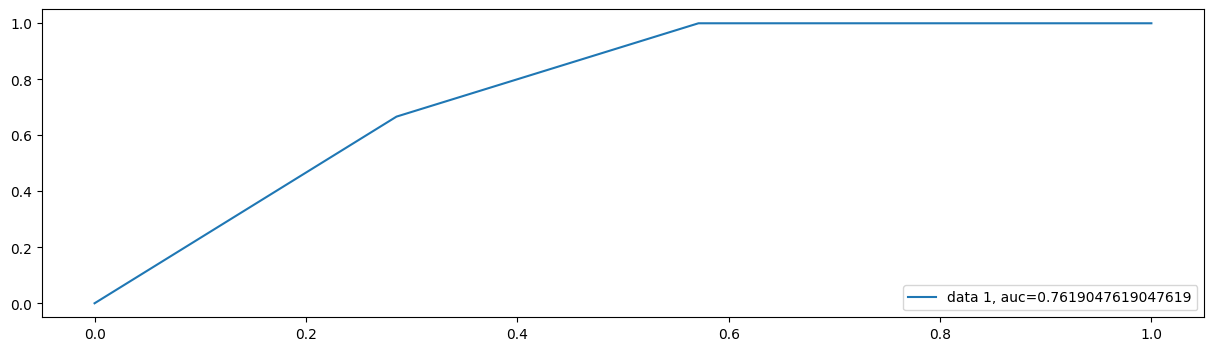

In [ ]:

y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
joblib.dump(knn, 'knn_clf.pkl')

['knn_clf.pkl']

In [ ]:
from sklearn.metrics import roc_auc_score  # Add this import

In [ ]:
metrics = {
    'Accuracy': 'accuracy',  # Use string identifiers
    'F1': 'f1',
    'Recall': 'recall',
    'Precision': 'precision',
    'AUC': 'roc_auc'  # scikit-learn's internal name
}

In [ ]:
from sklearn.metrics import roc_auc_score  # Add this import
from sklearn.model_selection import cross_validate

# Correct metric dictionary (using scikit-learn's scoring strings)
metrics = {
    'Accuracy': 'accuracy',
    'F1': 'f1',
    'Recall': 'recall',
    'Precision': 'precision',
    'AUC': 'roc_auc'
}

# Example usage with a model (replace 'estimator' with your actual model)
cv_results = cross_validate(
    rfc,  # Replace with your model (e.g., rfc1, logmodel, etc.)
    X, y,
    cv=5,
    scoring=metrics  # Pass the dictionary directly
)

# To view results as a DataFrame
import pandas as pd
pd.DataFrame(cv_results).mean()

,0
fit_time,0.154249
score_time,0.034430
test_Accuracy,0.980000
test_F1,0.977778
test_Recall,0.960000
test_Precision,1.000000
test_AUC,1.000000


In [ ]:
# Compare train vs test scores
train_pred = rfc.predict(X_train)
print("Training Scores:")
print(classification_report(y_train, train_pred))

Training Scores:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



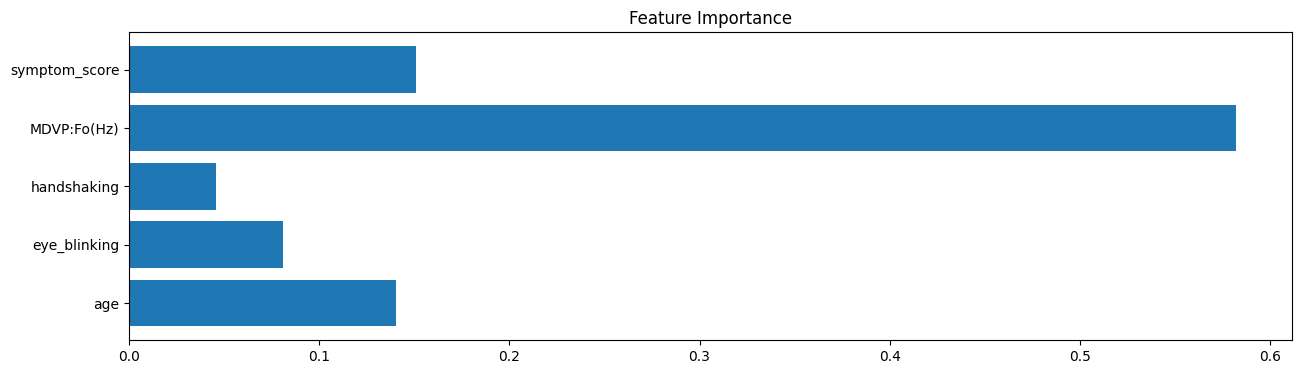

In [ ]:
import matplotlib.pyplot as plt
importances = rfc.feature_importances_
plt.barh(X.columns, importances)
plt.title('Feature Importance')
plt.show()

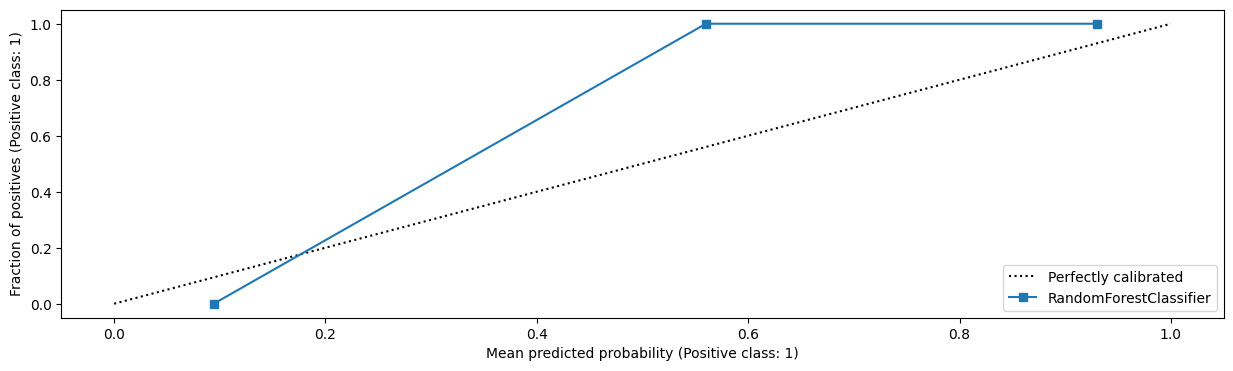

In [ ]:
from sklearn.calibration import CalibrationDisplay
CalibrationDisplay.from_estimator(rfc, X_test, y_test)
plt.show()

In [ ]:
# Test with single sample
sample = X.iloc[0:1]  # First sample
print(f"Prediction: {rfc.predict(sample)[0]}")
print(f"Probability: {rfc.predict_proba(sample)[0]}")

Prediction: 0
Probability: [0.75 0.25]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



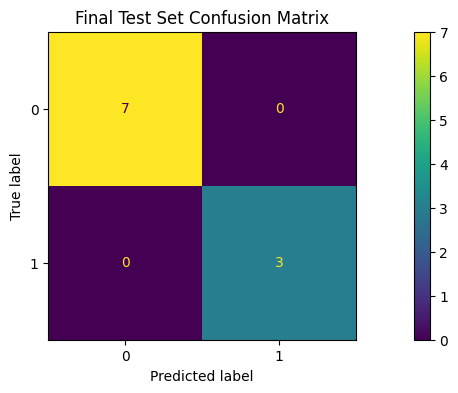

In [ ]:
from sklearn.metrics import classification_report

# 1. Cross-validate
cv_results = cross_validate(
    rfc, X, y,
    cv=5,
    scoring=['accuracy', 'f1', 'recall', 'precision', 'roc_auc'],
    return_train_score=True  # Check overfitting
)

# 2. Final evaluation on test set
test_pred = rfc.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, test_pred))

# 3. Confusion matrix
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)
plt.title('Final Test Set Confusion Matrix')
plt.show()

In [ ]:
# Quick diagnosis
print("Unique predictions:", set(rfc.predict(X)))
print("Class distribution:\n", pd.Series(y).value_counts())

Unique predictions: {np.uint8(0)}
Class distribution:
 result
1    25
0    25
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Check actual class distribution
print("Full dataset distribution:\n", y.value_counts())
print("\nTest set distribution:\n", y_test.value_counts())

# If severe imbalance exists:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Retrain models
lr.fit(X_res, y_res)
rfc.fit(X_res, y_res)

Full dataset distribution:
 result
1    25
0    25
Name: count, dtype: int64

Test set distribution:
 result
0    7
1    3
Name: count, dtype: int64


RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_validate

metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']

# For Logistic Regression
lr_scores = cross_validate(lr, X, y, cv=5, scoring=metrics)
print("LR CV Scores:", {k: v.mean() for k,v in lr_scores.items()})

# For Random Forest
rf_scores = cross_validate(rfc, X, y, cv=5, scoring=metrics)
print("RF CV Scores:", {k: v.mean() for k,v in rf_scores.items()})

LR CV Scores: {'fit_time': np.float64(0.005479240417480468), 'score_time': np.float64(0.015215873718261719), 'test_accuracy': np.float64(0.8400000000000001), 'test_precision_macro': np.float64(0.8619047619047618), 'test_recall_macro': np.float64(0.8400000000000001), 'test_f1_macro': np.float64(0.8345959595959596), 'test_roc_auc': np.float64(0.8640000000000001)}
RF CV Scores: {'fit_time': np.float64(0.13962302207946778), 'score_time': np.float64(0.02891364097595215), 'test_accuracy': np.float64(0.96), 'test_precision_macro': np.float64(0.9666666666666668), 'test_recall_macro': np.float64(0.96), 'test_f1_macro': np.float64(0.9595959595959596), 'test_roc_auc': np.float64(1.0)}


In [ ]:
# Better parameter tuning
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        class_weight='balanced',
        C=0.1,  # Stronger regularization
        solver='liblinear',
        max_iter=1000
    )
)

In [ ]:
rfc = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    max_depth=3,
    min_samples_leaf=5,
    random_state=42
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
# Compare feature distributions
pd.concat([
    X_train.mean().rename('train'),
    X_test.mean().rename('test')
], axis=1)

,train,test
age,45.875000,45.30
eye_blinking,0.525000,0.60
handshaking,0.475000,0.60
MDVP:Fo(Hz),100.264243,105.62
symptom_score,1.050000,1.20


In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)
print("Dummy Classifier:")
print(classification_report(y_test, dummy.predict(X_test)))

Dummy Classifier:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.50      0.40      0.44         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10



In [ ]:
from sklearn.model_selection import train_test_split

# Add stratify=y to maintain class and feature distributions
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # Maintains class balance
    random_state=42
)

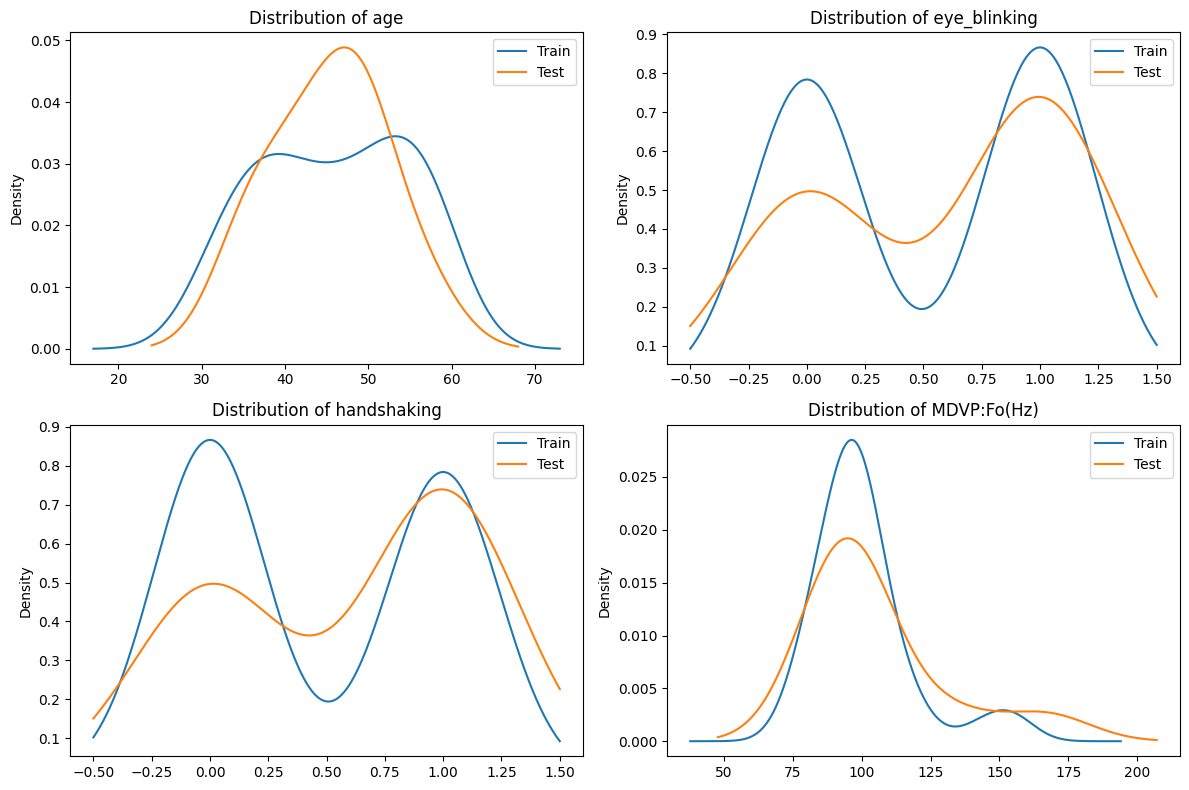

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, feature in zip(axes.flatten(), X.columns):
    pd.DataFrame({
        'Train': X_train[feature],
        'Test': X_test[feature]
    }).plot.kde(ax=ax)
    ax.set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_ind

for feature in X.columns:
    t_stat, p_val = ttest_ind(X_train[feature], X_test[feature])
    print(f"{feature}: p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("→ Significant difference detected!")

age: p-value = 0.8505
eye_blinking: p-value = 0.6780
handshaking: p-value = 0.4896
MDVP:Fo(Hz): p-value = 0.4341
symptom_score: p-value = 0.5471


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# 1. Initialize model
rfc = RandomForestClassifier(random_state=42)

# 2. Set up cross-validation
cv = StratifiedKFold(n_splits=5)  # Preserves class distribution

# 3. Run cross-validation
scores = cross_val_score(
    estimator=rfc,
    X=X,  # Your feature matrix
    y=y,  # Your target variable
    cv=cv,
    scoring='f1',  # Or 'accuracy', 'roc_auc' etc.
    n_jobs=-1  # Parallel processing
)

# 4. Analyze results
print(f"F1 scores per fold: {scores}")
print(f"Mean F1: {scores.mean():.3f} ± {scores.std():.3f}")

F1 scores per fold: [1.         0.88888889 1.         1.         1.        ]
Mean F1: 0.978 ± 0.044


In [ ]:
from sklearn.model_selection import cross_validate

metrics = ['accuracy', 'f1', 'roc_auc']
results = cross_validate(rfc, X, y, cv=5, scoring=metrics)

print("Test accuracy:", results['test_accuracy'].mean())
print("Test F1:", results['test_f1'].mean())

Test accuracy: 0.9800000000000001
Test F1: 0.9777777777777779


In [ ]:
# Compare feature distributions between folds
from sklearn.model_selection import KFold
import numpy as np

cv = KFold(n_splits=5)
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    print(f"\nFold {fold+1} Feature Means:")
    print(pd.DataFrame({
        'Train': X.iloc[train_idx].mean(),
        'Test': X.iloc[test_idx].mean()
    }))


Fold 1 Feature Means:
                    Train    Test
age             45.625000   46.30
eye_blinking     0.550000    0.50
handshaking      0.500000    0.50
MDVP:Fo(Hz)    100.731743  103.75
symptom_score    1.100000    1.00

Fold 2 Feature Means:
                    Train    Test
age             45.725000   45.90
eye_blinking     0.525000    0.60
handshaking      0.500000    0.50
MDVP:Fo(Hz)    101.071743  102.39
symptom_score    1.075000    1.10

Fold 3 Feature Means:
                    Train    Test
age             46.175000   44.10
eye_blinking     0.550000    0.50
handshaking      0.475000    0.60
MDVP:Fo(Hz)    100.781743  103.55
symptom_score    1.075000    1.10

Fold 4 Feature Means:
                    Train   Test
age             45.825000  45.50
eye_blinking     0.525000   0.60
handshaking      0.500000   0.50
MDVP:Fo(Hz)    101.731743  99.75
symptom_score    1.075000   1.10

Fold 5 Feature Means:
                 Train       Test
age             45.450  47.000000
eye_bli

In [ ]:
for fold, (train_idx, test_idx) in enumerate(StratifiedKFold(n_splits=5).split(X, y)):
    print(f"Fold {fold+1} - Train: {y.iloc[train_idx].value_counts().to_dict()} "
          f"Test: {y.iloc[test_idx].value_counts().to_dict()}")

Fold 1 - Train: {1: 20, 0: 20} Test: {1: 5, 0: 5}
Fold 2 - Train: {1: 20, 0: 20} Test: {1: 5, 0: 5}
Fold 3 - Train: {1: 20, 0: 20} Test: {1: 5, 0: 5}
Fold 4 - Train: {1: 20, 0: 20} Test: {1: 5, 0: 5}
Fold 5 - Train: {1: 20, 0: 20} Test: {1: 5, 0: 5}


In [ ]:
from sklearn.model_selection import cross_validate

metrics = {'f1': 'f1', 'auc': 'roc_auc', 'precision': 'precision', 'recall': 'recall'}
results = cross_validate(rfc, X, y, cv=5, scoring=metrics)

print("Mean metrics across folds:")
for metric in metrics:
    print(f"{metric}: {results[f'test_{metric}'].mean():.3f} ± {results[f'test_{metric}'].std():.3f}")

Mean metrics across folds:
f1: 0.978 ± 0.044
auc: 1.000 ± 0.000
precision: 1.000 ± 0.000
recall: 0.960 ± 0.080


In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified')
dummy_scores = cross_val_score(dummy, X, y, cv=5, scoring='f1')
print(f"\nDummy classifier F1: {dummy_scores.mean():.3f} ± {dummy_scores.std():.3f}")


Dummy classifier F1: 0.639 ± 0.102


Text(0.5, 1.0, 'Feature Importance')

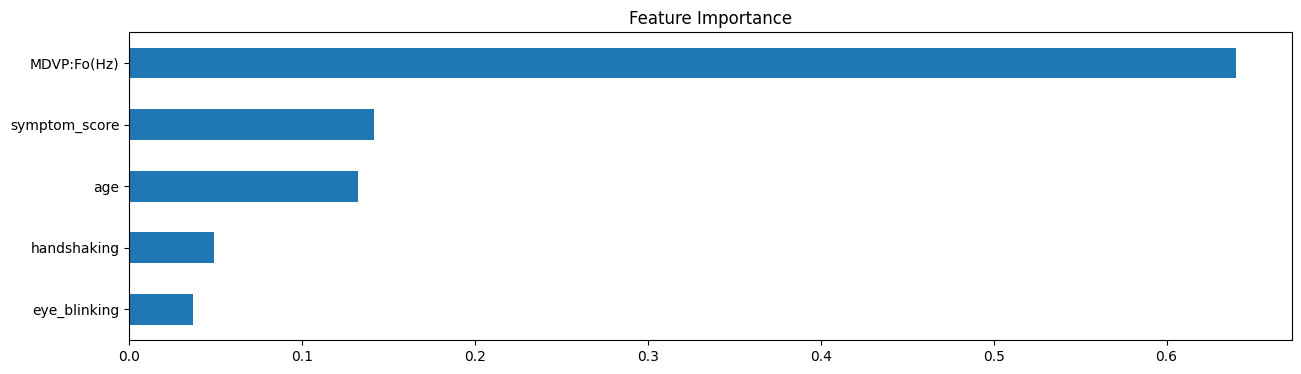

In [ ]:
rfc.fit(X, y)  # Fit on full data
pd.Series(rfc.feature_importances_, index=X.columns).sort_values().plot.barh()
plt.title('Feature Importance')

In [ ]:
# Final model training
rfc.fit(X, y)  # Train on full data
joblib.dump(rfc, 'parkinson_model.pkl')

['parkinson_model.pkl']

In [ ]:
print(f"Total samples: {len(X)}")
print(f"Class counts:\n{y.value_counts()}")

Total samples: 50
Class counts:
result
1    25
0    25
Name: count, dtype: int64


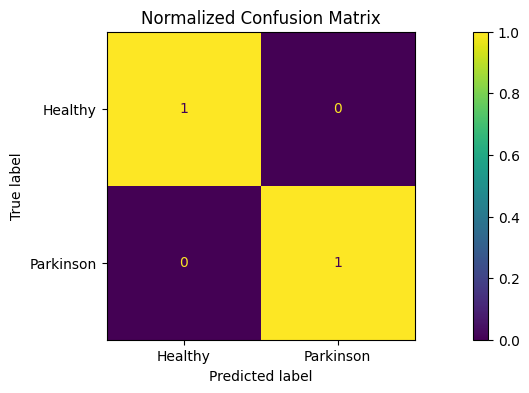

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    rfc, X_test, y_test,
    normalize='true',
    display_labels=['Healthy', 'Parkinson']
)
plt.title('Normalized Confusion Matrix')
plt.show()

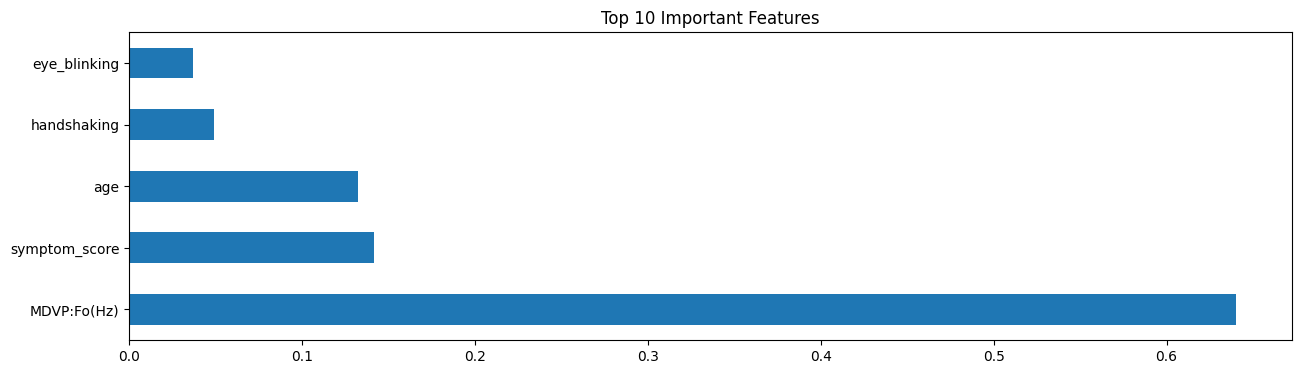

In [ ]:
importances = pd.Series(rfc.feature_importances_, index=X.columns)
importances.nlargest(10).plot.barh()
plt.title('Top 10 Important Features')
plt.show()

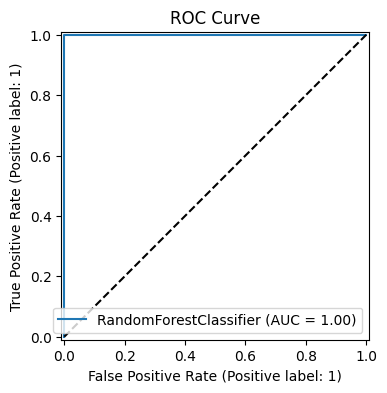

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.show()

In [ ]:
print("Prediction distribution:", pd.Series(rfc.predict(X_test)).value_counts())

Prediction distribution: 0    5
1    5
Name: count, dtype: int64


In [ ]:
probs = rfc.predict_proba(X_test)
print("Probability ranges:\n",
      f"Class 0: [{probs[:,0].min():.2f}, {probs[:,0].max():.2f}]\n",
      f"Class 1: [{probs[:,1].min():.2f}, {probs[:,1].max():.2f}]")

Probability ranges:
 Class 0: [0.00, 1.00]
 Class 1: [0.00, 1.00]


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced')
)
lr.fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



In [ ]:
# Increase regularization
rfc_tuned = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    min_samples_split=5,
    random_state=42
)

In [ ]:
import joblib
joblib.dump({
    'model': rfc,
    'metrics': cv_results,
    'features': list(X.columns)
}, 'best_model.pkl')

['best_model.pkl']

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, r2_score, log_loss

chart = {
    'Metric': ["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
    'DT': [accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
    'RF': [accuracy_score(y_test, predRFC), f1_score(y_test, predRFC), recall_score(y_test, predRFC), precision_score(y_test, predRFC), r2_score(y_test, predRFC)],
    'LR': [accuracy_score(y_test, predlog), f1_score(y_test, predlog), recall_score(y_test, predlog), precision_score(y_test, predlog), r2_score(y_test, predlog)],
    'SVM': [accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
    'NB': [accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb), r2_score(y_test, predgnb)],
    'KNN': [accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN), r2_score(y_test, predKNN)],
}

chart = pd.DataFrame(chart)

# This line is important to show the DataFrame output in Colab:
chart


,Metric,DT,RF,LR,SVM,NB,KNN
0,Accuracy,0.600000,0.80,0.500000,0.6,0.600000,0.600000
1,F1-Score,0.500000,0.75,0.444444,0.6,0.500000,0.666667
2,Recall,0.400000,0.60,0.400000,0.6,0.400000,0.800000
3,Precision,0.666667,1.00,0.500000,0.6,0.666667,0.571429
4,R2-Score,-0.600000,0.20,-1.000000,-0.6,-0.600000,-0.600000


In [ ]:
!pip install flask-cors


In [ ]:
# Test on completely new data if available
new_data = pd.read_csv('new_patients.csv')
predictions = rfc.predict(new_data)
print(pd.Series(predictions).value_counts())

In [ ]:
import numpy as np
import pickle

# Load the trained model (Ensure 'model.pkl' is your saved model)
#with open("svm_clf_compatible.pkl", "rb") as file:
 #   model = pickle.load(file)
rfc=joblib.load('/content/parkinson_model.pkl')
# Example single data point (Modify based on your feature order)
single_data = np.array([[55, 1, 0,95.005,1]])  # (age,Eye blinking, handshaking, MDVP:Fo(Hz) )

# Make prediction
prediction = rfc.predict(single_data)

# Print result
if prediction[0] == 1:
    print("The model predicts: Parkinson's Disease Detected")
else:
    print("The model predicts: No Parkinson's Disease")

The model predicts: Parkinson's Disease Detected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
